### 數據分析

In [1]:
import numpy as np
import matplotlib.pyplot as plt

準備模擬資料：一條直線$f(x)=1.2x+0.8$

In [4]:
x = np.linspace(0, 5, 50) #0到5取50個點
y = 1.2*x + 0.8

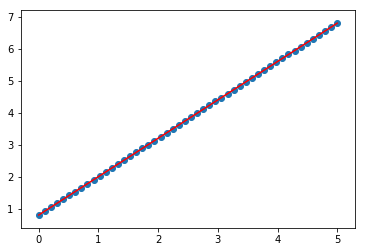

In [7]:
plt.plot(x, y, 'r')
plt.scatter(x, y)

noise：雜訊，相信數據背後含有一個涵式，在數據中不符合此函式的資料就稱為雜訊

增加雜訊項$f(x)+\varepsilon(x)$

In [8]:
y = 1.2*x + 0.8 + 0.6*np.random.randn(50)

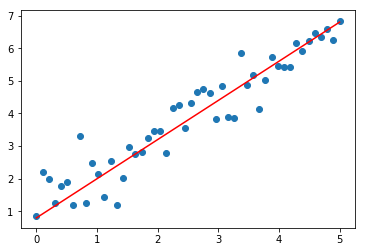

In [11]:
plt.scatter(x, y)
plt.plot(x, 1.2*x+0.8, 'r')

#### 使用sklearn套件的LinearRegression

In [12]:
x #1x50陣列

array([0.        , 0.10204082, 0.20408163, 0.30612245, 0.40816327,
       0.51020408, 0.6122449 , 0.71428571, 0.81632653, 0.91836735,
       1.02040816, 1.12244898, 1.2244898 , 1.32653061, 1.42857143,
       1.53061224, 1.63265306, 1.73469388, 1.83673469, 1.93877551,
       2.04081633, 2.14285714, 2.24489796, 2.34693878, 2.44897959,
       2.55102041, 2.65306122, 2.75510204, 2.85714286, 2.95918367,
       3.06122449, 3.16326531, 3.26530612, 3.36734694, 3.46938776,
       3.57142857, 3.67346939, 3.7755102 , 3.87755102, 3.97959184,
       4.08163265, 4.18367347, 4.28571429, 4.3877551 , 4.48979592,
       4.59183673, 4.69387755, 4.79591837, 4.89795918, 5.        ])

In [13]:
y

array([0.85917435, 2.19850555, 1.98721196, 1.24302619, 1.76934562,
       1.90193251, 1.19878267, 3.3156429 , 1.26886074, 2.4745675 ,
       2.14894212, 1.42593033, 2.5352603 , 1.20039695, 2.01778193,
       2.9857898 , 2.74924001, 2.82654778, 3.26144849, 3.45112032,
       3.45580365, 2.79223992, 4.16985994, 4.26178575, 3.54732941,
       4.32188911, 4.66315831, 4.73613396, 4.64196805, 3.82305959,
       4.85379522, 3.90724626, 3.86651699, 5.86839304, 4.87503731,
       5.19303243, 4.13886309, 5.01288971, 5.74550092, 5.46130116,
       5.43664818, 5.41202713, 6.16377308, 5.91198008, 6.22406663,
       6.45408306, 6.33649015, 6.57409356, 6.25853097, 6.84300955])

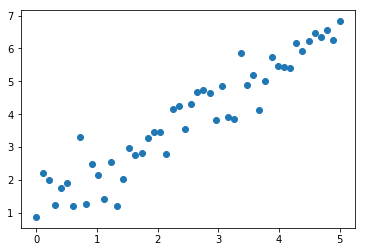

In [14]:
plt.scatter(x, y)

本來x是

$$[x_1, x_2, \ldots, x_{50}]$$

但sklearn內的LinearRegression，要的資料類型是

$$[x_1], [x_2], \ldots, [x_{50}]]$$

需將每筆訓練資料\[ ]起來，當作一列

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
regr = LinearRegression()

In [20]:
X = x.reshape(50, 1) #改變array形狀，變更為50x1陣列
X

array([[0.        ],
       [0.10204082],
       [0.20408163],
       [0.30612245],
       [0.40816327],
       [0.51020408],
       [0.6122449 ],
       [0.71428571],
       [0.81632653],
       [0.91836735],
       [1.02040816],
       [1.12244898],
       [1.2244898 ],
       [1.32653061],
       [1.42857143],
       [1.53061224],
       [1.63265306],
       [1.73469388],
       [1.83673469],
       [1.93877551],
       [2.04081633],
       [2.14285714],
       [2.24489796],
       [2.34693878],
       [2.44897959],
       [2.55102041],
       [2.65306122],
       [2.75510204],
       [2.85714286],
       [2.95918367],
       [3.06122449],
       [3.16326531],
       [3.26530612],
       [3.36734694],
       [3.46938776],
       [3.57142857],
       [3.67346939],
       [3.7755102 ],
       [3.87755102],
       [3.97959184],
       [4.08163265],
       [4.18367347],
       [4.28571429],
       [4.3877551 ],
       [4.48979592],
       [4.59183673],
       [4.69387755],
       [4.795

In [21]:
regr.fit(X, y) #讓線性迴歸模型學習

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
Y = regr.predict(X)#預測

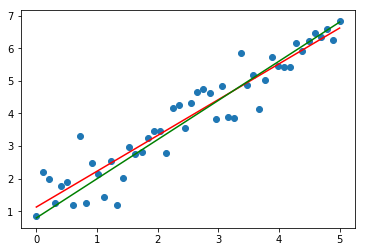

In [25]:
plt.scatter(x, y) #訓練集y（真實世界的資料）
plt.plot(x, Y, 'r') #模型預測出的y
plt.plot(x, 1.2*x+0.8, 'g') #完美函式的樣子

### Overfitting

在訓練集中過度擬合

In [26]:
from ipywidgets import interact

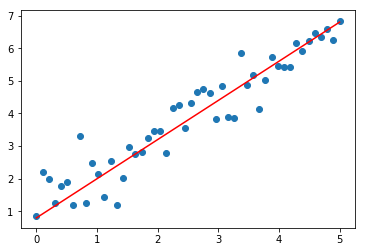

In [28]:
plt.scatter(x, y)
plt.plot(x, 1.2*x + 0.8, 'r')

In [29]:
X = np.linspace(0, 5, 1000)

def my_fit(n):
    Y = 3.5*np.sin(n*X) + 3.5    #後面加的項：中心；前面乘的值：震幅大小
    plt.scatter(x, y)
    plt.plot(X, Y, 'r')

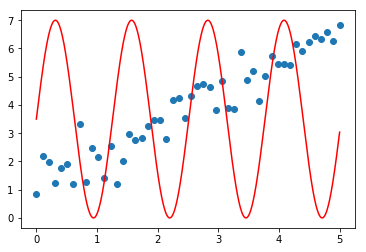

In [30]:
my_fit(5)

In [31]:
interact(my_fit, n=(1, 500))

interactive(children=(IntSlider(value=250, description='n', max=500, min=1), Output()), _dom_classes=('widget-…

<function __main__.my_fit(n)>

### 標準函數訓練及測試

分「訓練資料」、「測試資料」

一般想要看算出的逼近函式在預測上是否是可靠的，會把一些資料留給「測試」，也就是在電腦計算時，不會計算到這些資料。等函式學成之後，再拿這些保留資料看函式是否準確

In [44]:
x = np.linspace(0, 5, 100)
y = 1.2*x + 0.8 + 0.5*np.random.randn(100)

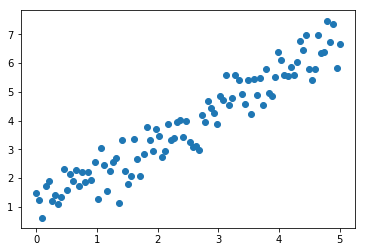

In [45]:
plt.scatter(x, y)

可使用sklearn.model_selection裡的train_test_split來亂數選一定百分比的資料

In [34]:
from sklearn.model_selection import train_test_split

training data：80%

testing data：20%

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=87)

In [47]:
len(x_train)

80

In [48]:
len(x_test)

20

In [49]:
x_train.shape

(80,)

In [53]:
x_train.shape = (80, 1)

In [55]:
x_train.shape

(80, 1)

In [57]:
x_test = x_test.reshape(20, 1)
x_test

array([[0.80808081],
       [4.09090909],
       [4.29292929],
       [1.61616162],
       [1.96969697],
       [1.26262626],
       [1.31313131],
       [1.46464646],
       [3.28282828],
       [0.35353535],
       [4.24242424],
       [5.        ],
       [2.92929293],
       [3.53535354],
       [4.64646465],
       [3.73737374],
       [0.15151515],
       [0.        ],
       [2.22222222],
       [1.66666667]])

In [58]:
regre = LinearRegression()

In [59]:
regre.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

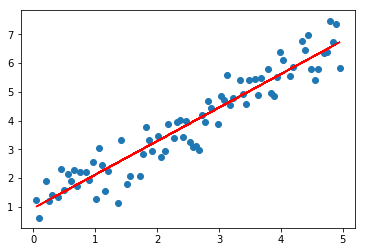

In [60]:
plt.scatter(x_train, y_train)
plt.plot(x_train, regre.predict(x_train), 'r')

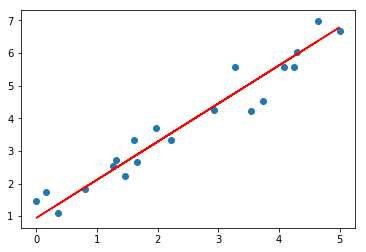

In [62]:
plt.scatter(x_test, y_test)
plt.plot(x_test, regre.predict(x_test), 'r')

overfitting：train data的準確度高於test data的準確度

In [63]:
from sklearn.datasets import load_boston

在scikit-learn內有一些真實世界的數據，稱為「Toy Datasets」

In [64]:
boston = load_boston()

In [65]:
boston.feature_names #查看數據中所有的features

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [66]:
X = boston.data
Y = boston.target

In [67]:
len(X)

506

In [68]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=87)

In [69]:
regr = LinearRegression()

In [70]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [71]:
y_predict = regr.predict(x_test)

Text(0, 0.5, 'Predicted Price')

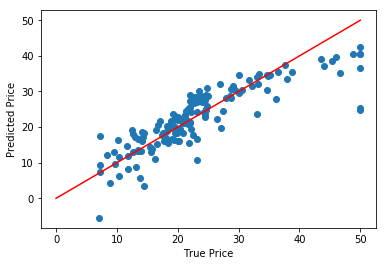

In [72]:
plt.scatter(y_test, y_predict) #若預測正確，點會在對角線上
plt.plot([0,50], [0,50], 'r') #對角線
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

在高房價的地方，預測的會偏低

In [75]:
print(boston.DESCR) #完整解釋數據內容

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

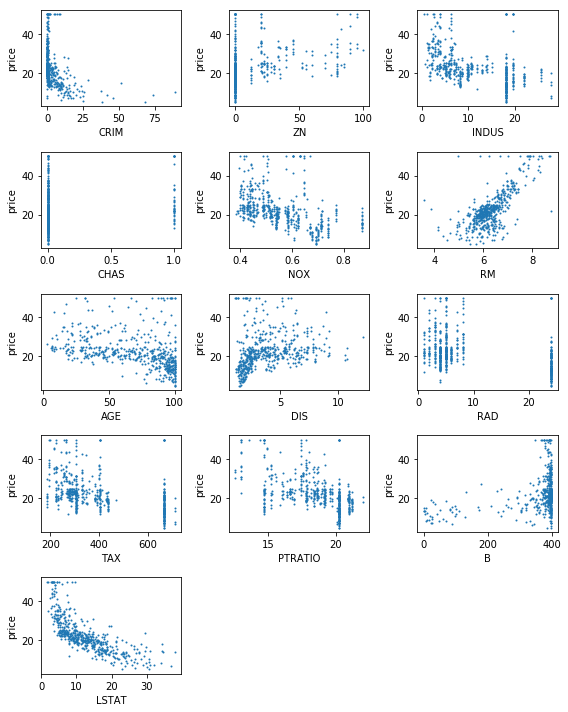

In [106]:
#每個feature與target之間的關係
plt.figure(figsize=(8,10)) #建立一個figure（空的顯示區）
for i, feature in enumerate(boston.feature_names):
    plt.subplot(5, 3, i+1)
    plt.scatter(X[:,i], Y, s=1)
    plt.ylabel('price')
    plt.xlabel(feature)
    plt.tight_layout() #圖表過度集中，可使用此分開

無事先給定顯示區，圖被壓縮

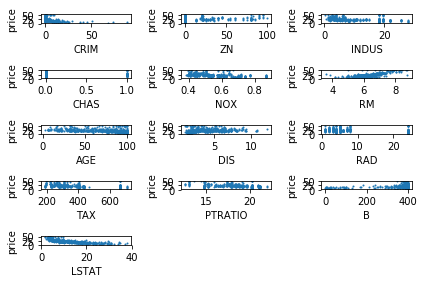

In [103]:
#每個feature與target之間的關係
# plt.figure(figsize=(8,10)) #建立一個figure（空的顯示區）
for i, feature in enumerate(boston.feature_names):
    plt.subplot(5, 3, i+1)
    plt.scatter(X[:,i], Y, s=1)
    plt.ylabel('price')
    plt.xlabel(feature)
    plt.tight_layout() #圖表過度集中，可使用此分開

中間圖的標籤會被覆蓋

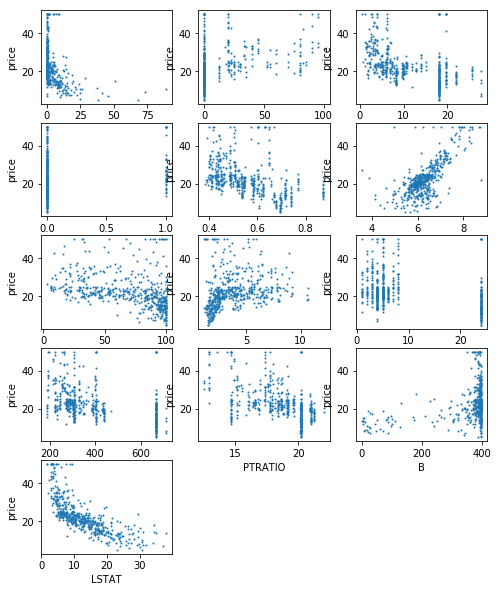

In [102]:
#每個feature與target之間的關係
plt.figure(figsize=(8,10)) #建立一個figure（空的顯示區）
for i, feature in enumerate(boston.feature_names):
    plt.subplot(5, 3, i+1)
    plt.scatter(X[:,i], Y, s=1)
    plt.ylabel('price')
    plt.xlabel(feature)
#     plt.tight_layout() #圖表過度集中，可使用此分開

### enumerate

In [88]:
L = ['a', 'b', 'c']

In [89]:
for i in L:
    print(i)

a
b
c


In [90]:
for i in range(3):
    print(i+1, L[i])

1 a
2 b
3 c


In [93]:
list(enumerate(L)) #讓python算，元素為第幾個

[(0, 'a'), (1, 'b'), (2, 'c')]

In [94]:
for i in enumerate(L): #enumerate(list)：會把list的index與list的元素（item），包成一個tuple，再將每個tuple包成按index排序的tuple
    print(i)

(0, 'a')
(1, 'b')
(2, 'c')


In [95]:
for i, j in enumerate(L):
    print(i+1, j)

1 a
2 b
3 c


### 畫多個圖

In [96]:
x = np.linspace(-10, 10, 200)

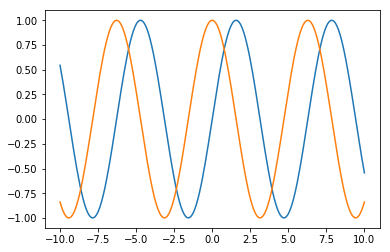

In [97]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

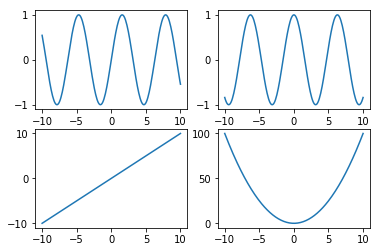

In [98]:
#plt.subplot()：畫多張圖
plt.subplot(2,2,1) #第一張 
plt.plot(x, np.sin(x))

plt.subplot(2,2,2) #第二張
plt.plot(x, np.cos(x))

plt.subplot(2,2,3) #第三張
plt.plot(x,x)

plt.subplot(2,2,4) #第四張
plt.plot(x, x**2)